In [1]:
import copy as cp
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
import sys
sys.path.append('../0_python_modules/')
import extras
import navjeet_hist as nh

In [2]:
approaches = np.array([
    'vamp2',
    'train-loo',
    'predict-loo',
    'RFE',
    'AMINO',
    'spectral-oasis',
    'MoSAIC',
    'shap',
    'saliency-FNN',
    'saliency-TVAE',
    'deepTICA',
    'ae-TICA',
    'TICA-VDE',
    'random'
])

In [3]:
names = np.array([
    'vamp2',
    'train_loo',
    'predict_loo',
    'rfe',
    'amino',
    'spectral_oasis',
    'mosaic',
    'shap',
    'saliency_fnn',
    'saliency_tvae',
    'deeptica',
    'ae_tica',
    'tica_vde',
    'random'
])

In [4]:
cs='y'
cu='c'
colors = [cu,cs,cs,cs,cu,cu,cu,cs,cs,cu,cu,cu,cu,cu]

## t4l

In [5]:
thists = [
    np.load(f'files_from_t4l/hists_{n}.npy')
for n in names]

textents = [
    np.load(f'files_from_t4l/extents_{n}.npy')
for n in names]

In [6]:
for i in thists: print(i.shape)

(1, 6, 100, 100)
(1, 5, 100, 100)
(1, 5, 100, 100)
(1, 5, 100, 100)
(1, 5, 100, 100)
(1, 1, 100, 100)
(3, 5, 100, 100)
(1, 5, 100, 100)
(2, 5, 100, 100)
(5, 5, 100, 100)
(4, 1, 100, 100)
(5, 5, 100, 100)
(4, 1, 100, 100)
(1, 5, 100, 100)


In [7]:
tweight = 0.06586344576253769
timpures = 0.44

In [8]:
tse=[]
for i in thists:
    t1=[]
    for j in i:
        t2=[]
        for k in j:
            ce=nh.classification_extent(k, cutoff=0.1, strategy='weighted',
                                output_type='jm', operation=2,
                                jm_lower=tweight, jm_impure=timpures)
            t2.append(ce)
        t1.append(t2)
    tse.append(t1)

In [9]:
for a,i in enumerate(tse):
    print(a, len(i), len(i[0]), approaches[a])

0 1 6 vamp2
1 1 5 train-loo
2 1 5 predict-loo
3 1 5 RFE
4 1 5 AMINO
5 1 1 spectral-oasis
6 3 5 MoSAIC
7 1 5 shap
8 2 5 saliency-FNN
9 5 5 saliency-TVAE
10 4 1 deepTICA
11 5 5 ae-TICA
12 4 1 TICA-VDE
13 1 5 random


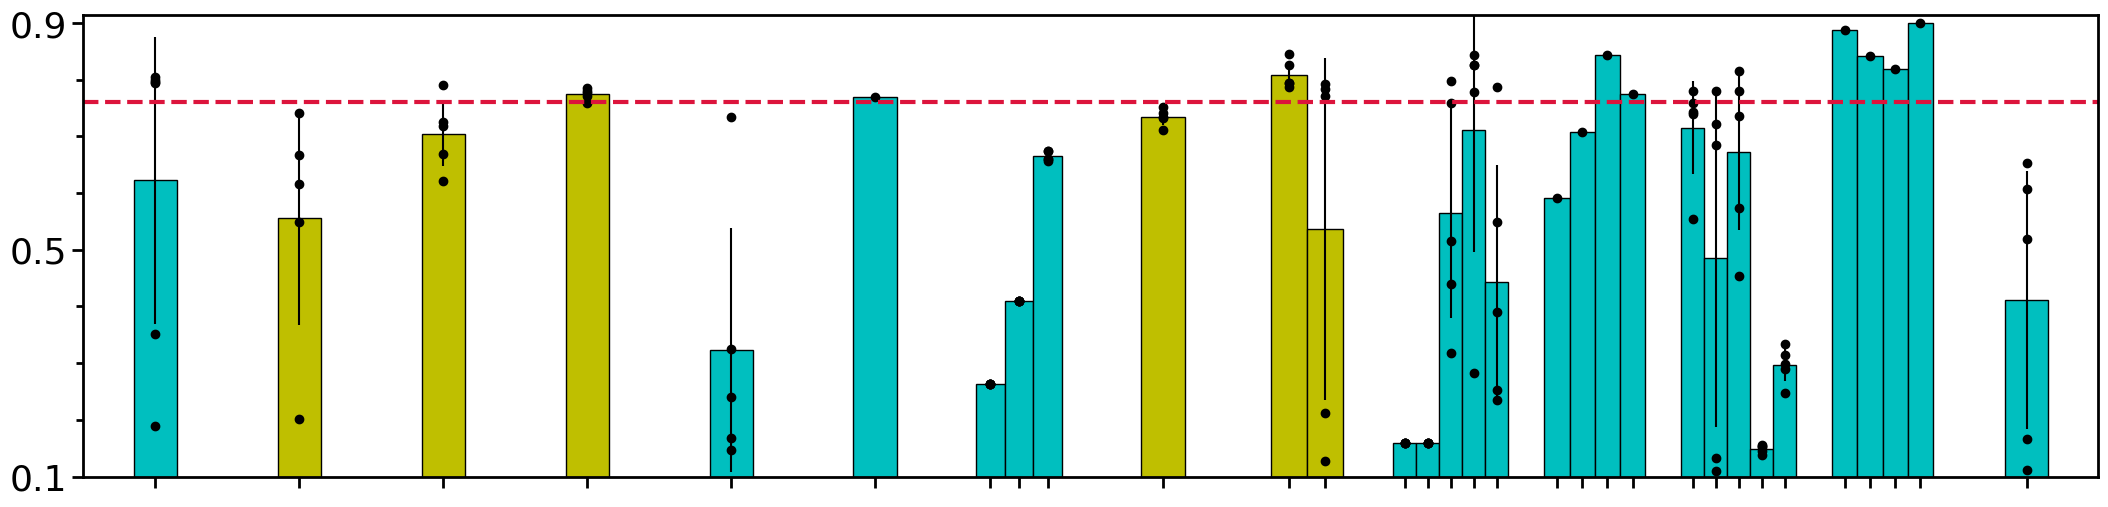

In [34]:
fig,ax=plt.subplots(1, figsize=(26,6))

xtics = np.array([])
for i in range(len(tse)):
    nb, means, stds, vals = len(tse[i]), np.mean(tse[i], axis=1), np.std(tse[i], axis=1), tse[i]

    if nb==1: w=0.3 ; xs=[i]
    elif nb==2: w=0.25 ; xs=[i-w/2,i+w/2]
    elif nb==3: w=0.6/nb ; xs=[i-w, i, i+w]
    elif nb==4: w=0.7/nb ;  xs=[i-3*w/2, i-w/2, i+w/2, i+3*w/2]
    elif nb==5: w=0.8/nb ; xs=[i-2*w, i-w, i, i+w, i+2*w]
    elif nb==6: w=0.8/nb ; xs=[i-5*w/2, i-3*w/2, i-w/2, i+w/2, i+3*w/2, i+5*w/2]
    xtics = np.concatenate((xtics, xs))

    ax.bar(xs, means, yerr=stds, color=colors[i], edgecolor='black', width=w)
    for a,i in enumerate(xs): ax.scatter([i for x in vals[a]], vals[a], c='black')
#
ax.spines[:].set_linewidth(2)
ax.set_xlim(-0.5,13.5) ; ax.set_ylim(0.1,0.915)
ax.set_xticks(xtics)
ax.set_yticks([0.1,0.5,0.9])
ax.tick_params(labelbottom=False, length=8, width=2, labelsize=26)
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(which='minor', length=5, width=2)
#
ax.errorbar([-0.5,13.5], [0.76,0.76], ls='--', color='crimson', lw=3)
#
plt.savefig('plots/t4l-1.pdf')
plt.show()

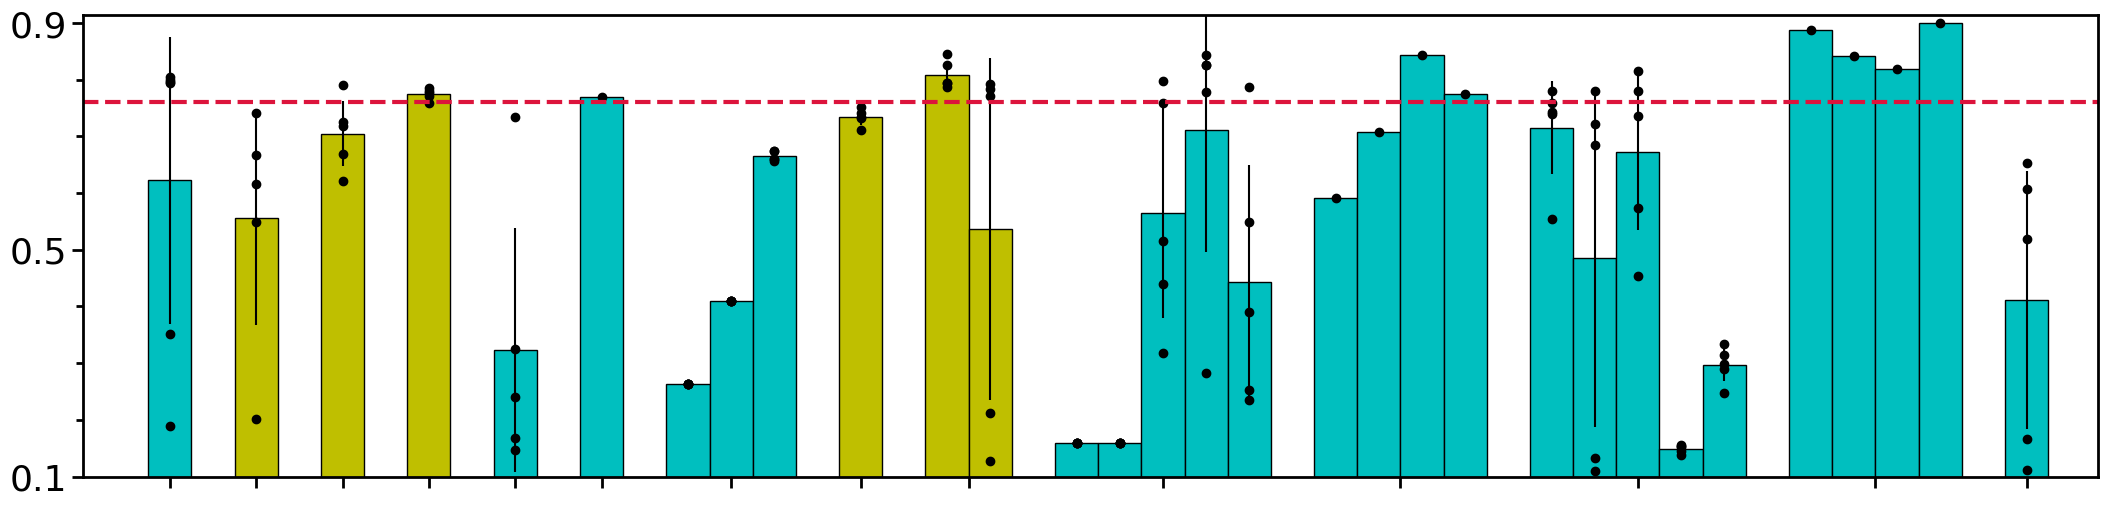

In [35]:
fig,ax=plt.subplots(1, figsize=(26,6))

xtics = np.array([])
xprev = 0
xmeans = []
for i in range(len(tse)):
    nb, means, stds, vals = len(tse[i]), np.mean(tse[i], axis=1), np.std(tse[i], axis=1), tse[i]
    
    xs = np.cumsum([0.3]*nb)+0.3 + xprev
    xtics = np.concatenate((xtics, xs))
    xprev = xtics[-1]
    xmeans.append(np.mean(xs))
    
    ax.bar(xs, means, yerr=stds, color=colors[i], edgecolor='black', width=w)
    for a,i in enumerate(xs): ax.scatter([i for x in vals[a]], vals[a], c='black')
#
ax.spines[:].set_linewidth(2)
ax.set_xlim(0,14) ; ax.set_ylim(0.1,0.915)
ax.set_xticks(xmeans)
ax.set_yticks([0.1,0.5,0.9])
ax.tick_params(labelbottom=False, length=8, width=2, labelsize=26)
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(which='minor', length=5, width=2)
#
ax.errorbar([0,14], [0.76,0.76], ls='--', color='crimson', lw=3)
#
plt.savefig('plots/t4l-2.pdf')
plt.show()

## mopr

In [18]:
mhists = [
    np.load(f'files_from_mopr/hists_{n}.npy')
for n in names]

mextents = [
    np.load(f'files_from_mopr/extents_{n}.npy')
for n in names]

In [19]:
mweight = 0.053523887413664886
mimpures = 0.4

In [20]:
mse=[]
for i in mhists:
    t1=[]
    for j in i:
        t2=[]
        for k in j:
            ce=nh.classification_extent(k, cutoff=0.1, strategy='weighted',
                                output_type='jm', operation=2,
                                jm_lower=mweight, jm_impure=mimpures)
            t2.append(ce)
        t1.append(t2)
    mse.append(t1)

/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/msahil/softwares/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [21]:
for a,i in enumerate(mse):
    print(a, len(i), len(i[0]), approaches[a])

0 1 10 vamp2
1 1 5 train-loo
2 1 5 predict-loo
3 1 5 RFE
4 1 5 AMINO
5 1 1 spectral-oasis
6 3 5 MoSAIC
7 1 5 shap
8 6 5 saliency-FNN
9 6 5 saliency-TVAE
10 3 1 deepTICA
11 6 5 ae-TICA
12 4 1 TICA-VDE
13 1 5 random


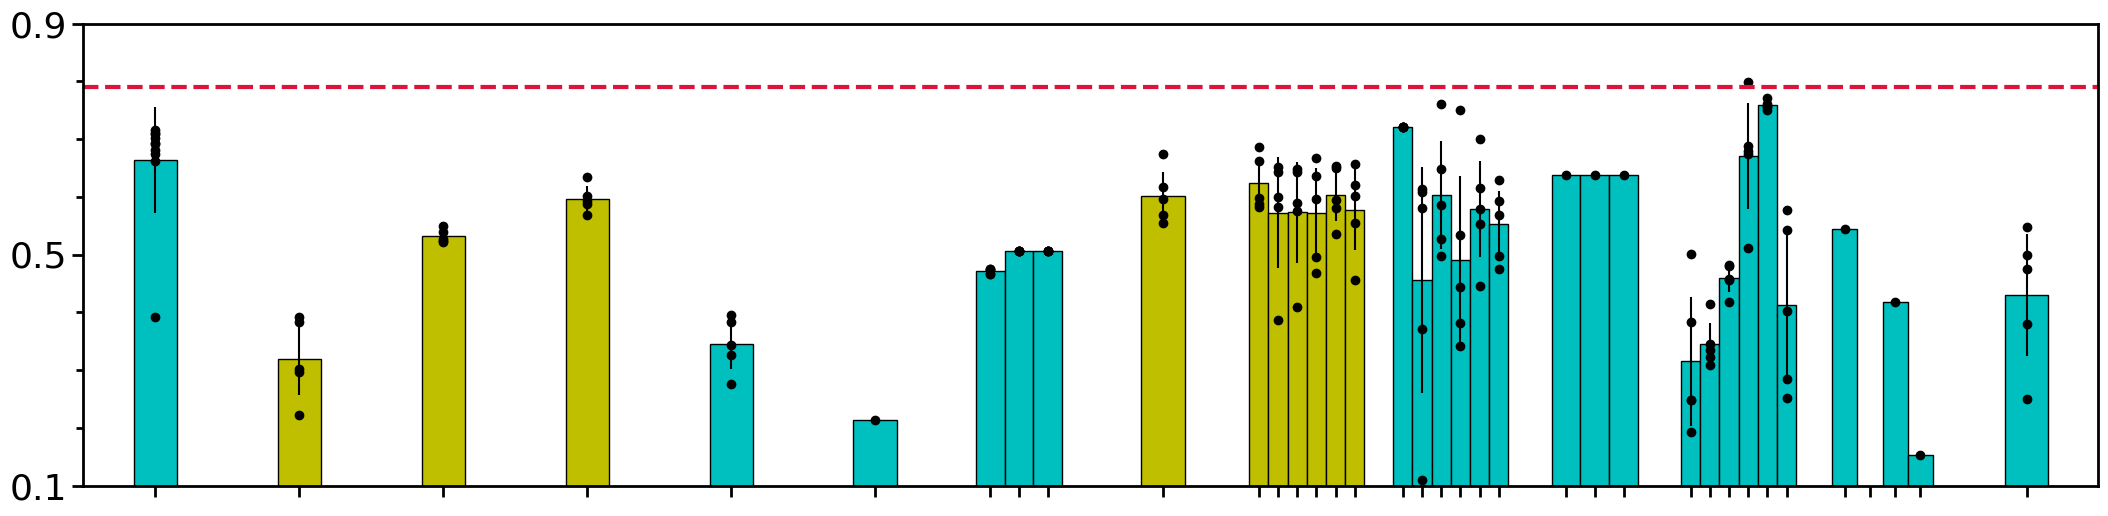

In [36]:
fig,ax=plt.subplots(1, figsize=(26,6))

xtics = np.array([])
for i in range(len(mse)):
    nb, means, stds, vals = len(mse[i]), np.mean(mse[i], axis=1), np.std(mse[i], axis=1), mse[i]

    if nb==1: w=0.3 ; xs=[i]
    elif nb==2: w=0.25 ; xs=[i-w/2,i+w/2]
    elif nb==3: w=0.6/nb ; xs=[i-w, i, i+w]
    elif nb==4: w=0.7/nb ;  xs=[i-3*w/2, i-w/2, i+w/2, i+3*w/2]
    elif nb==5: w=0.8/nb ; xs=[i-2*w, i-w, i, i+w, i+2*w]
    elif nb==6: w=0.8/nb ; xs=[i-5*w/2, i-3*w/2, i-w/2, i+w/2, i+3*w/2, i+5*w/2]
    xtics = np.concatenate((xtics, xs))

    ax.bar(xs, means, yerr=stds, color=colors[i], edgecolor='black', width=w)
    for a,i in enumerate(xs): ax.scatter([i for x in vals[a]], vals[a], c='black')
#
ax.spines[:].set_linewidth(2)
ax.set_xlim(-0.5,13.5) ; ax.set_ylim(0.1,0.9)
ax.set_xticks(xtics)
ax.set_yticks([0.1,0.5,0.9])
ax.tick_params(labelbottom=False, length=8, width=2, labelsize=26)
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(which='minor', length=5, width=2)
#
ax.errorbar([-0.5,13.5], [0.79,0.79], ls='--', color='crimson', lw=3)
#
plt.savefig('plots/mopr-1.pdf')
plt.show()

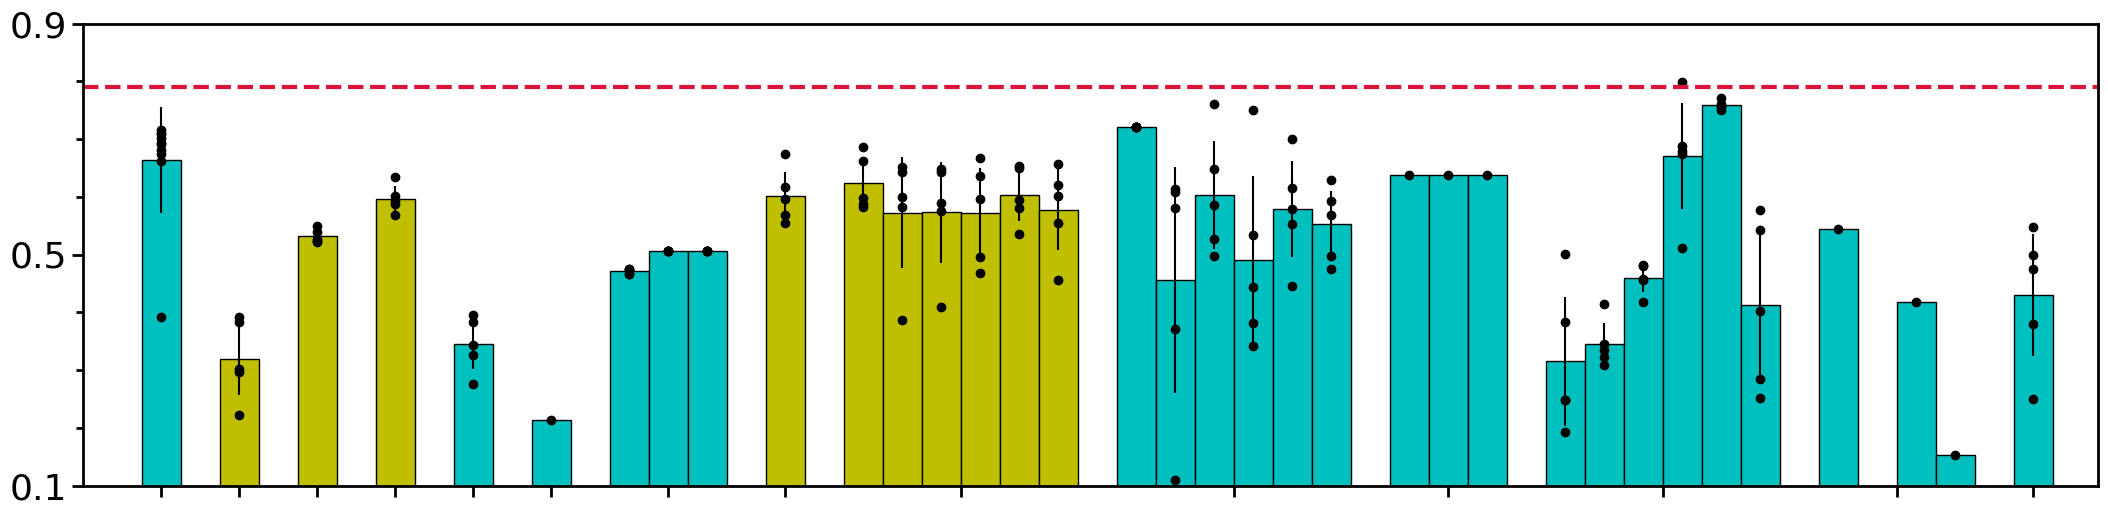

In [37]:
fig,ax=plt.subplots(1, figsize=(26,6))

xtics = np.array([])
xprev = 0
xmeans = []
for i in range(len(mse)):
    nb, means, stds, vals = len(mse[i]), np.mean(mse[i], axis=1), np.std(mse[i], axis=1), mse[i]
    
    xs = np.cumsum([0.3]*nb)+0.3 + xprev
    xtics = np.concatenate((xtics, xs))
    xprev = xtics[-1]
    xmeans.append(np.mean(xs))
    
    ax.bar(xs, means, yerr=stds, color=colors[i], edgecolor='black', width=w)
    for a,i in enumerate(xs): ax.scatter([i for x in vals[a]], vals[a], c='black')
#
ax.spines[:].set_linewidth(2)
ax.set_xlim(0,15.5) ; ax.set_ylim(0.1,0.9)
ax.set_xticks(xmeans)
ax.set_yticks([0.1,0.5,0.9])
ax.tick_params(labelbottom=False, length=8, width=2, labelsize=26)
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(which='minor', length=5, width=2)
#
ax.errorbar([0,15.5], [0.79,0.79], ls='--', color='crimson', lw=3)
#
plt.savefig('plots/mopr-2.pdf')
plt.show()

## plots

### t4l

In [88]:
m=0
print(names[m])
print(np.mean(tse[m], axis=1))
tse[m]

vamp2
[0.62262709]


[[0.8055644300605831,
  0.18925721000870027,
  0.3520383606656683,
  0.7951996308309105,
  0.7936016403236843,
  0.80010128482224]]

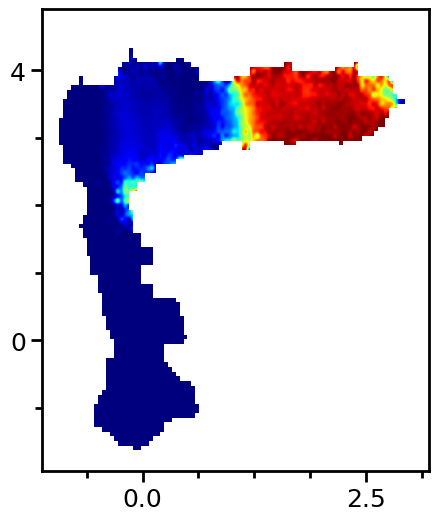

In [89]:
h=0 ; i=3
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(thists[m][h][i], 
          aspect='auto', extent=textents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/t4l_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [90]:
m=1
print(names[m])
print(np.mean(tse[m], axis=1))
tse[m]

train_loo
[0.55528211]


[[0.20181738042689015,
  0.6674130651511875,
  0.6165807190577033,
  0.5495965994690458,
  0.7410027692063561]]

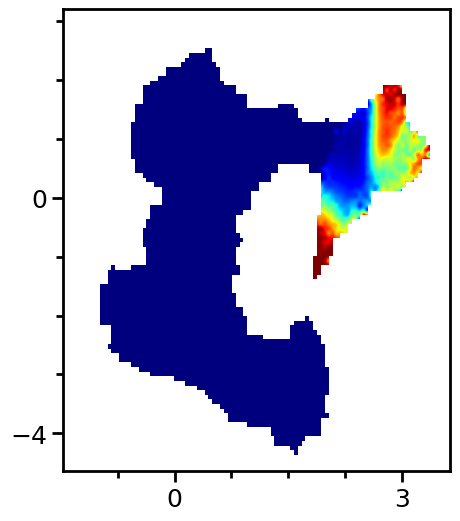

In [91]:
h=0 ; i=3
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(thists[m][h][i], 
          aspect='auto', extent=textents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/t4l_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [92]:
m=2
print(names[m])
print(np.mean(tse[m], axis=1))
tse[m]

predict_loo
[0.7049528]


[[0.6212324518113148,
  0.6690913508923879,
  0.7249787284872706,
  0.791452246125254,
  0.7180092126062286]]

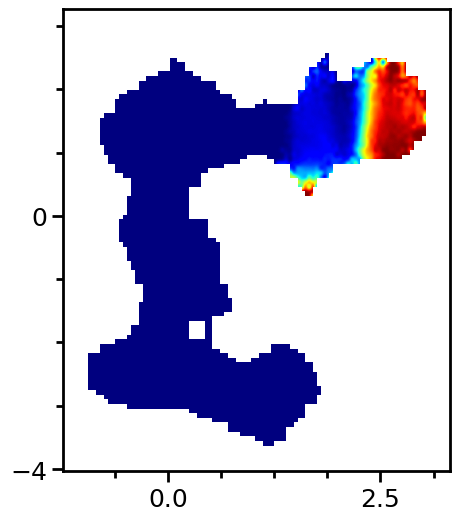

In [93]:
h=0 ; i=4
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(thists[m][h][i], 
          aspect='auto', extent=textents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/t4l_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [94]:
m=3
print(names[m])
print(np.mean(tse[m], axis=1))
tse[m]

rfe
[0.77415191]


[[0.7591798839309745,
  0.7804365412478743,
  0.7706332925923487,
  0.7846961260902257,
  0.7758137087687759]]

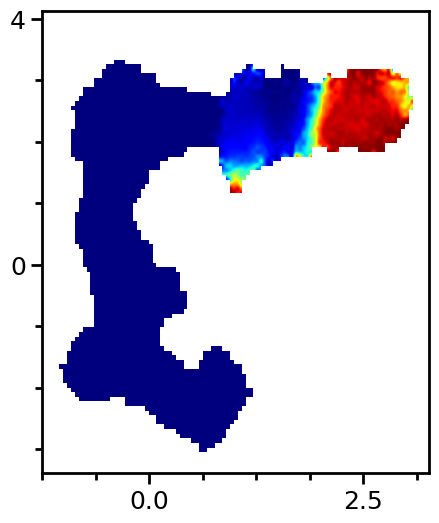

In [95]:
h=0 ; i=4
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(thists[m][h][i], 
          aspect='auto', extent=textents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/t4l_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [96]:
m=4
print(names[m])
print(np.mean(tse[m], axis=1))
tse[m]

amino
[0.32288558]


[[0.14713283422137607,
  0.7342013875573227,
  0.16791069960503618,
  0.32432902496849764,
  0.24085394683542155]]

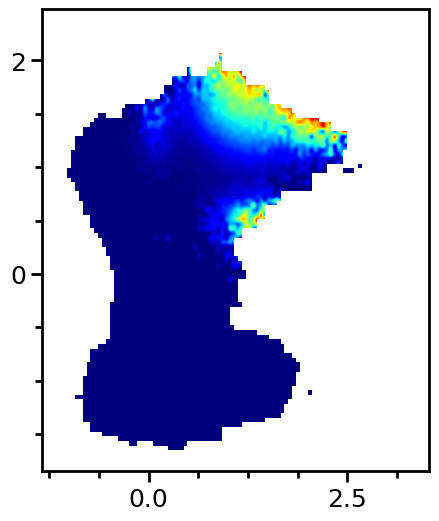

In [97]:
h=0 ; i=3
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(thists[m][h][i], 
          aspect='auto', extent=textents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/t4l_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [99]:
m=5
print(names[m])
print(np.mean(tse[m], axis=1))
tse[m]

spectral_oasis
[0.76984136]


[[0.769841357336073]]

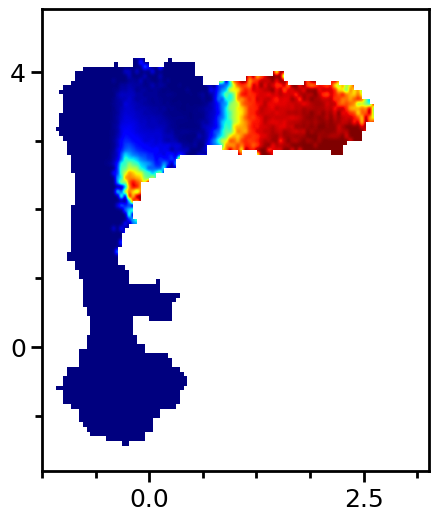

In [100]:
h=0 ; i=0
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(thists[m][h][i], 
          aspect='auto', extent=textents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/t4l_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [101]:
m=6
print(names[m])
print(np.mean(tse[m], axis=1))
tse[m]

mosaic
[0.26355058 0.41041376 0.66493091]


[[0.26355058143077215,
  0.26355058143077215,
  0.26355058143077215,
  0.26355058143077215,
  0.26355058143077215],
 [0.41041376349980413,
  0.41041376349980413,
  0.41041376349980413,
  0.41041376349980413,
  0.41041376349980413],
 [0.6738392098068297,
  0.6597604593460542,
  0.6564807767586623,
  0.6748136500835544,
  0.6597604593460542]]

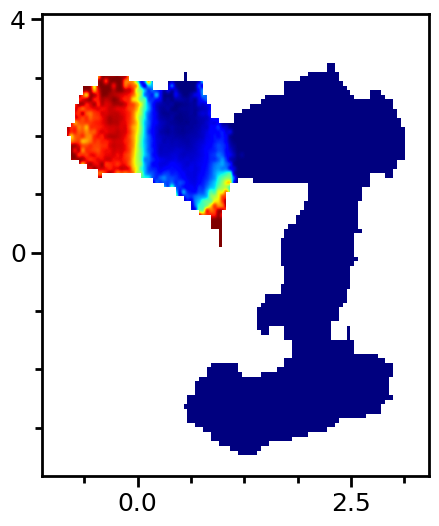

In [104]:
h=2 ; i=0
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(thists[m][h][i], 
          aspect='auto', extent=textents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/t4l_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [105]:
m=7
print(names[m])
print(np.mean(tse[m], axis=1))
tse[m]

shap
[0.73418782]


[[0.7328960134746447,
  0.7406981870361881,
  0.7516538754327826,
  0.7110436480455495,
  0.734647397550902]]

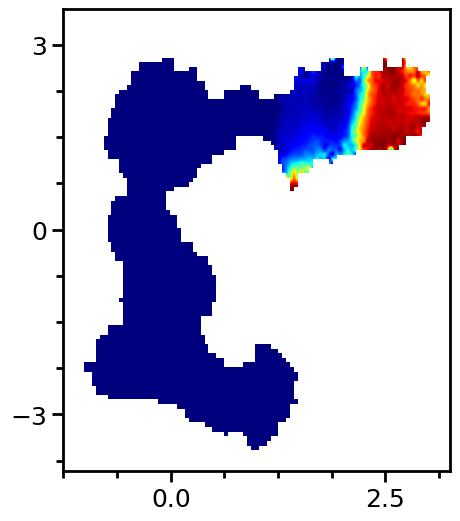

In [106]:
h=0 ; i=0
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(thists[m][h][i], 
          aspect='auto', extent=textents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/t4l_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [107]:
m=8
print(names[m])
print(np.mean(tse[m], axis=1))
tse[m]

saliency_fnn
[0.80915147 0.53675395]


[[0.7933669007545787,
  0.7867355125481168,
  0.8452498563383823,
  0.7938812876130669,
  0.8265238076185881],
 [0.7919223081474764,
  0.7829009068802614,
  0.2115921080104085,
  0.12688569957873402,
  0.7704687034834461]]

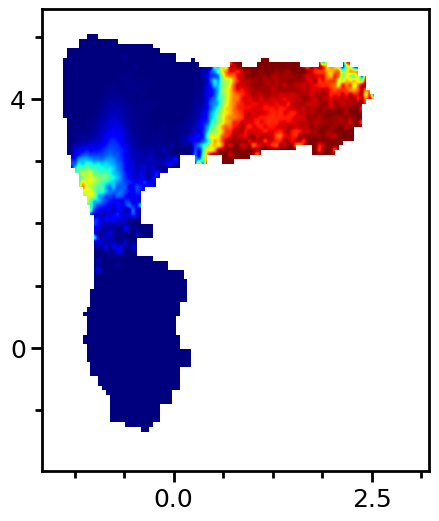

In [109]:
h=1 ; i=4
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(thists[m][h][i], 
          aspect='auto', extent=textents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/t4l_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [111]:
m=9
print(names[m])
print(np.mean(tse[m], axis=1))
tse[m]

saliency_tvae
[0.15936418 0.15936418 0.56566997 0.71122332 0.44304386]


[[0.15936418321695303,
  0.15936418321695303,
  0.15936418321695303,
  0.15936418321695303,
  0.15936418321695303],
 [0.15936418321695303,
  0.15936418321695303,
  0.15936418321695303,
  0.15936418321695303,
  0.15936418321695303],
 [0.7595334454362745,
  0.4387562760199631,
  0.5148640280654324,
  0.31707792964971493,
  0.7981181669379941],
 [0.8434545282508957,
  0.8255295345907199,
  0.7787048672915722,
  0.8250761960834438,
  0.28335146180948956],
 [0.7869635088300934,
  0.39085748465931625,
  0.2354361598735528,
  0.5494471428192981,
  0.2525149891588619]]

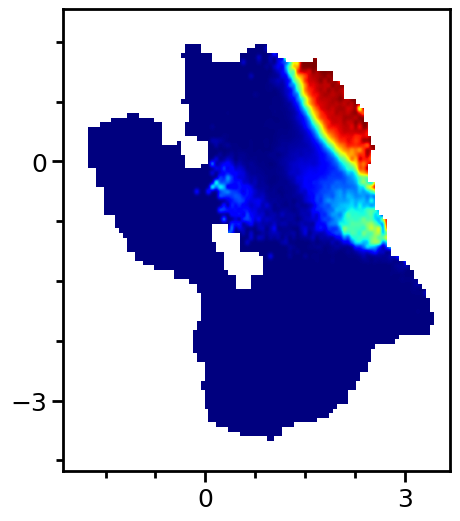

In [116]:
h=4 ; i=3
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(thists[m][h][i], 
          aspect='auto', extent=textents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/t4l_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [117]:
m=10
print(names[m])
print(np.mean(tse[m], axis=1))
tse[m]

deeptica
[0.59143566 0.70775043 0.84351914 0.7741004 ]


[[0.591435661963553],
 [0.7077504302726642],
 [0.8435191434552254],
 [0.7741003954522052]]

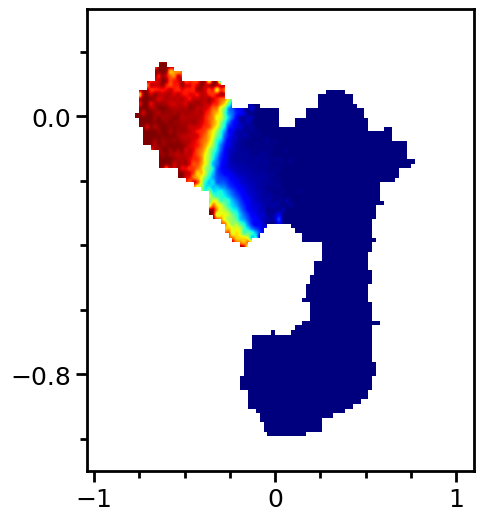

In [121]:
h=3 ; i=0
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(thists[m][h][i], 
          aspect='auto', extent=textents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/t4l_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [122]:
m=11
print(names[m])
print(np.mean(tse[m], axis=1))
tse[m]

ae_tica
[0.71513407 0.48610813 0.67163585 0.14906697 0.29720212]


[[0.7800364429232085,
  0.7590981115195456,
  0.7431910891119061,
  0.7391128773057616,
  0.5542318374569769],
 [0.685440278105186,
  0.1334833241196387,
  0.7798956495556424,
  0.7215859353545307,
  0.11013546440627633],
 [0.816146599033291,
  0.4530324185200394,
  0.7802563076823247,
  0.5734185395609582,
  0.7353254071972658],
 [0.13863793305173658,
  0.15589375038714132,
  0.14561008920579613,
  0.15135189625536483,
  0.15384117745080095],
 [0.2904772126900782,
  0.3338152938151382,
  0.2989261697811672,
  0.3148080895034547,
  0.24798385369655443]]

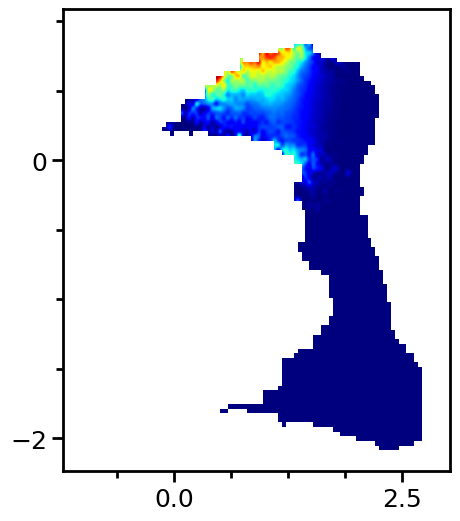

In [127]:
h=4 ; i=2
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(thists[m][h][i], 
          aspect='auto', extent=textents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/t4l_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [128]:
m=12
print(names[m])
print(np.mean(tse[m], axis=1))
tse[m]

tica_vde
[0.88828011 0.84122103 0.81887356 0.89967237]


[[0.88828010955323],
 [0.8412210256959805],
 [0.8188735570814079],
 [0.899672366506447]]

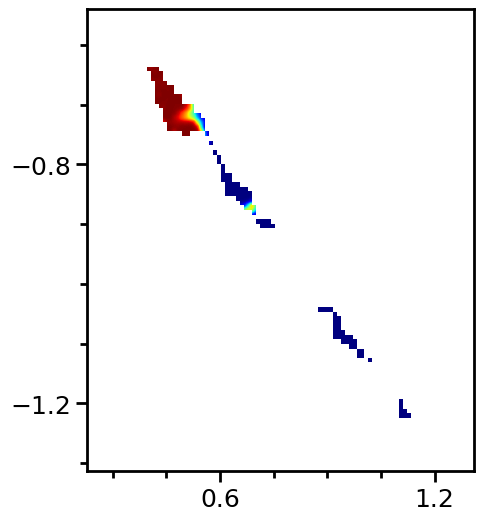

In [132]:
h=3 ; i=0
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(thists[m][h][i], 
          aspect='auto', extent=textents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/t4l_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [13]:
m=13
print(names[m])
print(np.mean(tse[m], axis=1))
tse[m]

random
[0.41119835]


[[0.5182440561280077,
  0.6527219679684345,
  0.6074842409299593,
  0.11098750301151308,
  0.1665539728634775]]

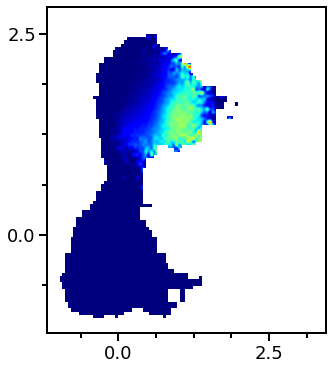

In [15]:
h=0 ; i=4
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(thists[m][h][i], 
          aspect='auto', extent=textents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/t4l_{names[m]}_h{h}.png', transparent=True)
plt.show()

### mopr

In [145]:
m=0
print(names[m])
print(np.mean(mse[m], axis=1))
mse[m]

vamp2
[0.66291344]


[[0.39220993686212635,
  0.7013741943267375,
  0.6612621179510738,
  0.7097873406437809,
  0.7091863120390512,
  0.6748633617397259,
  0.6805929202880308,
  0.7148209813614019,
  0.6933421124457092,
  0.6916951060581045]]

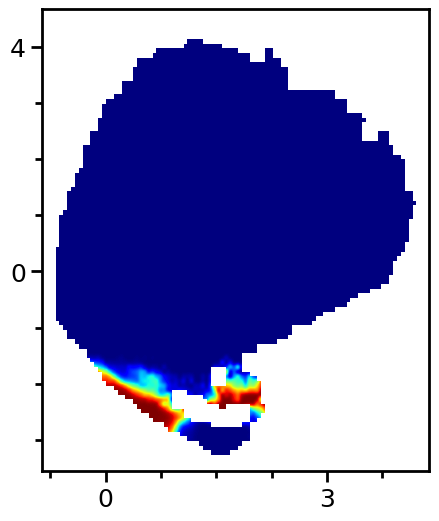

In [146]:
h=0 ; i=2
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(mhists[m][h][i], 
          aspect='auto', extent=mextents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/mopr_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [147]:
m=1
print(names[m])
print(np.mean(mse[m], axis=1))
mse[m]

train_loo
[0.31903963]


[[0.3013747130032089,
  0.2221663983888085,
  0.38332819691035863,
  0.2964379771421237,
  0.3918908436687832]]

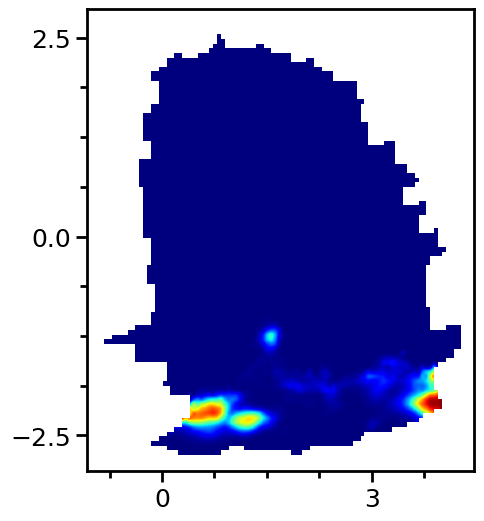

In [148]:
h=0 ; i=0
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(mhists[m][h][i], 
          aspect='auto', extent=mextents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/mopr_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [149]:
m=2
print(names[m])
print(np.mean(mse[m], axis=1))
mse[m]

predict_loo
[0.53198577]


[[0.5392874439137861,
  0.548883271302895,
  0.523444148482227,
  0.5272412933202709,
  0.5210727014107759]]

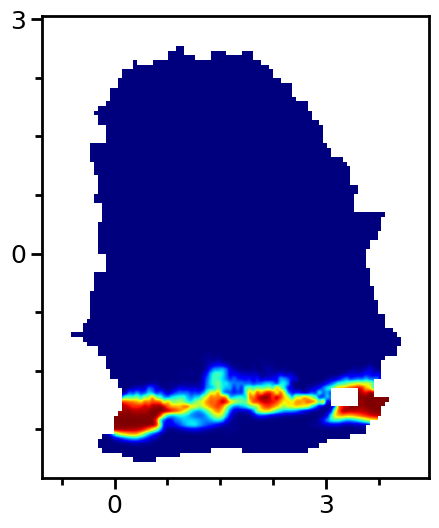

In [150]:
h=0 ; i=0
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(mhists[m][h][i], 
          aspect='auto', extent=mextents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/mopr_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [151]:
m=3
print(names[m])
print(np.mean(mse[m], axis=1))
mse[m]

rfe
[0.59686399]


[[0.5922005428336742,
  0.5688332003603738,
  0.6339812867620679,
  0.5877377872358103,
  0.601567136655417]]

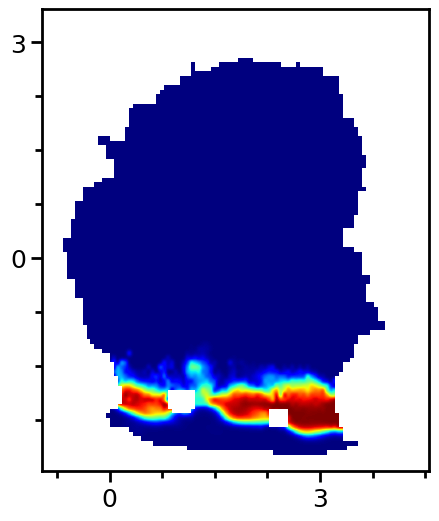

In [152]:
h=0 ; i=0
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(mhists[m][h][i], 
          aspect='auto', extent=mextents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/mopr_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [154]:
m=4
print(names[m])
print(np.mean(mse[m], axis=1))
mse[m]

amino
[0.34482706]


[[0.3253233407631168,
  0.27560143857508684,
  0.38394049198757974,
  0.39518003160296755,
  0.3440900087581663]]

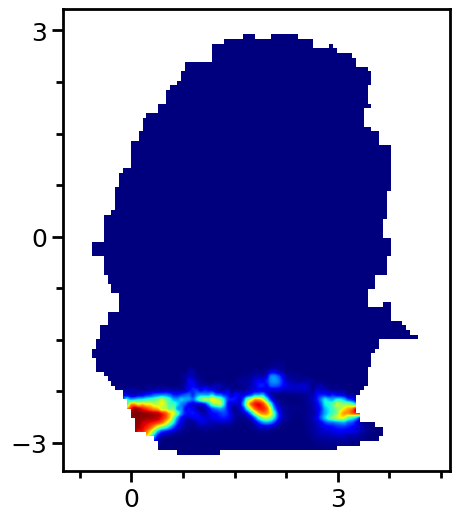

In [155]:
h=0 ; i=4
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(mhists[m][h][i], 
          aspect='auto', extent=mextents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/mopr_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [156]:
m=5
print(names[m])
print(np.mean(mse[m], axis=1))
mse[m]

spectral_oasis
[0.21355367]


[[0.2135536715777786]]

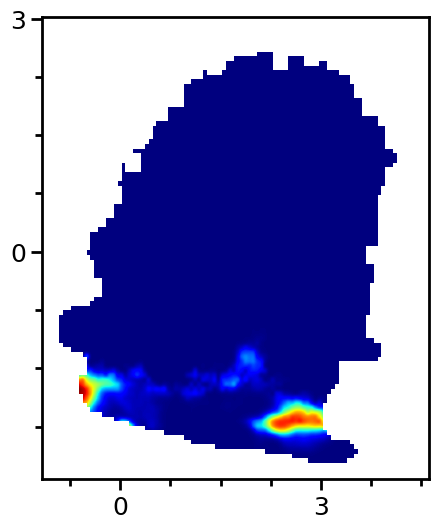

In [157]:
h=0 ; i=0
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(mhists[m][h][i], 
          aspect='auto', extent=mextents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/mopr_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [158]:
m=6
print(names[m])
print(np.mean(mse[m], axis=1))
mse[m]

mosaic
[0.47104068 0.50551456 0.50551456]


[[0.4725214015505535,
  0.47473082900308,
  0.47473082900308,
  0.4666101635018649,
  0.4666101635018649],
 [0.5055145577116685,
  0.5055145577116685,
  0.5055145577116685,
  0.5055145577116685,
  0.5055145577116685],
 [0.5055145577116685,
  0.5055145577116685,
  0.5055145577116685,
  0.5055145577116685,
  0.5055145577116685]]

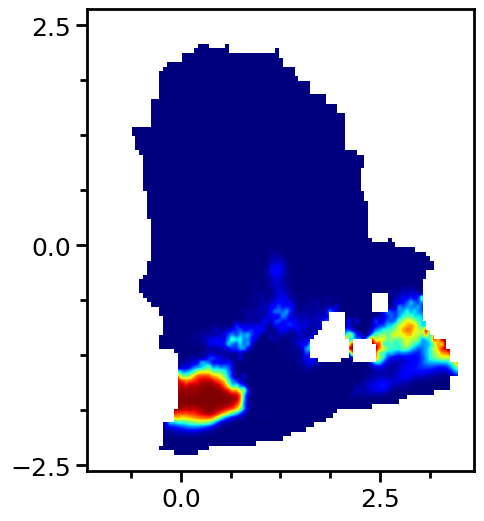

In [161]:
h=2 ; i=0
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(mhists[m][h][i], 
          aspect='auto', extent=mextents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/mopr_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [162]:
m=7
print(names[m])
print(np.mean(mse[m], axis=1))
mse[m]

shap
[0.60185649]


[[0.5955036506696715,
  0.5681841084220576,
  0.5554081235869294,
  0.6739130177049106,
  0.6162735694778674]]

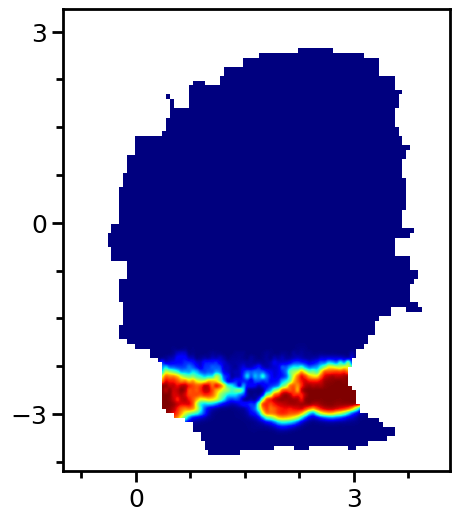

In [163]:
h=0 ; i=4
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(mhists[m][h][i], 
          aspect='auto', extent=mextents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/mopr_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [164]:
m=8
print(names[m])
print(np.mean(mse[m], axis=1))
mse[m]

saliency_fnn
[0.62327159 0.57257569 0.57285798 0.57248995 0.60258256 0.57781466]


[[0.582706831419583,
  0.6860349432314656,
  0.6624196260831728,
  0.5872220603362125,
  0.5979744815727278],
 [0.5822499745711208,
  0.6428584626368389,
  0.6002667665489757,
  0.6510825183574351,
  0.3864207516587492],
 [0.575033956373218,
  0.5890134404168863,
  0.6434159267328206,
  0.6485926021439148,
  0.40823399355822976],
 [0.4952522032048195,
  0.6360440170893956,
  0.5966979097050082,
  0.6663048823405124,
  0.4681507483723671],
 [0.5935105433277774,
  0.5809752909354924,
  0.6492344279368303,
  0.6529011200642347,
  0.536291441179903],
 [0.5540051906090959,
  0.45512167601284476,
  0.6020195775073448,
  0.6575310465393615,
  0.6203958197973505]]

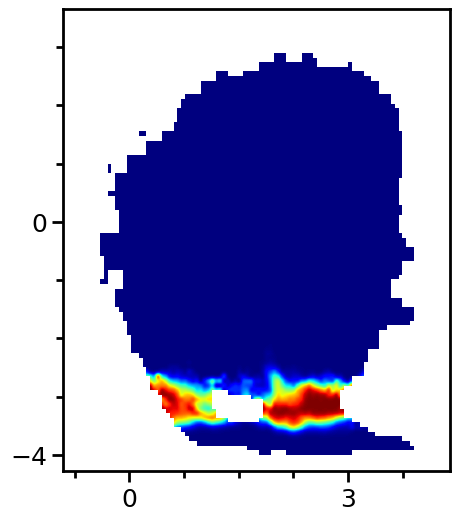

In [170]:
h=5 ; i=0
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(mhists[m][h][i], 
          aspect='auto', extent=mextents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/mopr_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [171]:
m=9
print(names[m])
print(np.mean(mse[m], axis=1))
mse[m]

saliency_tvae
[0.72021935 0.45595975 0.60344877 0.48991505 0.5782804  0.55274254]


[[0.7202193496354857,
  0.7202193496354857,
  0.7202193496354857,
  0.7202193496354857,
  0.7202193496354857],
 [0.37033562880972326,
  0.6125674704368749,
  0.6075005274972844,
  0.10964627875013036,
  0.5797488273463219],
 [0.584890129806312,
  0.6487547720656601,
  0.4973934968609234,
  0.7597542768000238,
  0.5264511848466941],
 [0.34074290957809616,
  0.3814690725608971,
  0.4436121959106599,
  0.534160051849735,
  0.7495910250140787],
 [0.5528914521137475,
  0.7007648437742005,
  0.6145703312305149,
  0.44524862888343403,
  0.5779267580224847],
 [0.4755329614744637,
  0.6293790204561974,
  0.4976071387318425,
  0.5688284405868792,
  0.5923651513247322]]

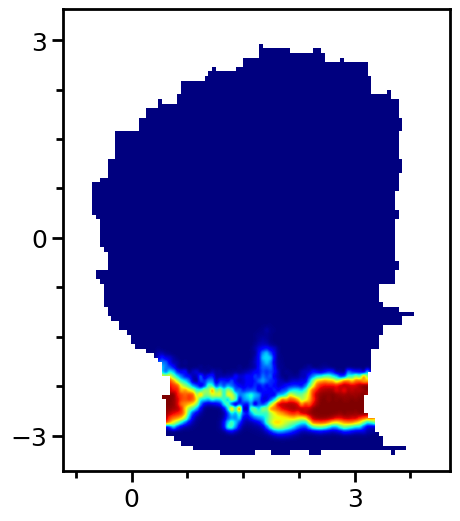

In [177]:
h=5 ; i=3
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(mhists[m][h][i], 
          aspect='auto', extent=mextents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/mopr_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [178]:
m=10
print(names[m])
print(np.mean(mse[m], axis=1))
mse[m]

deeptica
[0.63752966 0.63752966 0.63752966]


[[0.6375296553604596], [0.6375296553604596], [0.6375296553604596]]

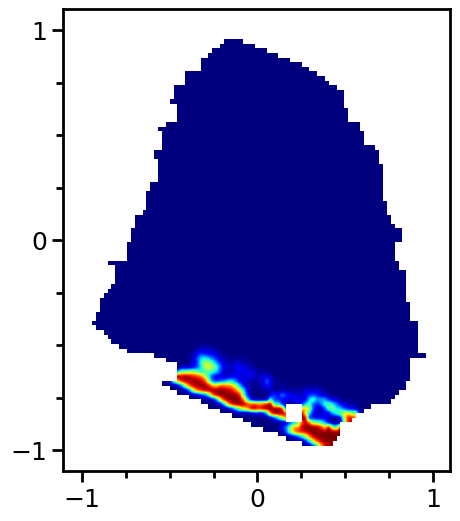

In [181]:
h=2 ; i=0
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(mhists[m][h][i], 
          aspect='auto', extent=mextents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/mopr_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [182]:
m=11
print(names[m])
print(np.mean(mse[m], axis=1))
mse[m]

ae_tica
[0.31476413 0.34468614 0.45848324 0.67018066 0.75907027 0.41173179]


[[0.5012792926445977,
  0.24857436287232118,
  0.38229706678691067,
  0.1928210879756988,
  0.24884886086499075],
 [0.4138824414452499,
  0.30940171211701806,
  0.3442996261167733,
  0.33398414297056017,
  0.3218627715730033],
 [0.4804899299195878,
  0.45635448287802083,
  0.48130869305545954,
  0.4172699949876707,
  0.45699309836377944],
 [0.7980204177966536,
  0.688283731370846,
  0.6747801699522505,
  0.5108549826465665,
  0.6789640174665228],
 [0.755101480308858,
  0.7574415394818,
  0.750955340329807,
  0.761049542959474,
  0.7708034430444534],
 [0.4022362392668778,
  0.5777287912146104,
  0.28488429676523946,
  0.2517436518554943,
  0.5420659818767102]]

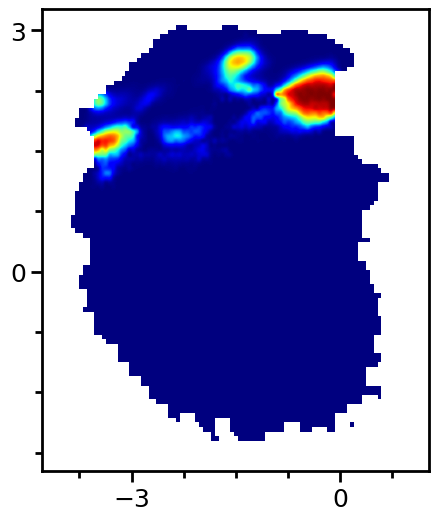

In [188]:
h=5 ; i=0
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(mhists[m][h][i], 
          aspect='auto', extent=mextents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/mopr_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [189]:
m=12
print(names[m])
print(np.mean(mse[m], axis=1))
mse[m]

tica_vde
[0.54449809        nan 0.41855943 0.15222713]


[[0.5444980946023183], [nan], [0.4185594332614389], [0.15222712729631166]]

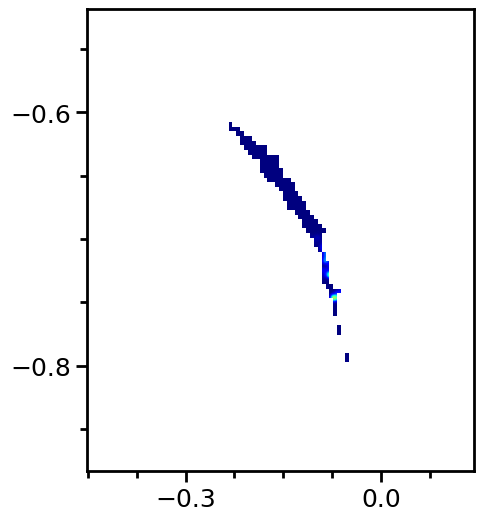

In [193]:
h=3 ; i=0
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(mhists[m][h][i], 
          aspect='auto', extent=mextents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/mopr_{names[m]}_h{h}.png', transparent=True)
plt.show()

In [19]:
m=13
print(names[m])
print(np.mean(mse[m], axis=1))
mse[m]

random
[0.43022171]


[[0.25052557856667185,
  0.47473887311386986,
  0.37941853369743683,
  0.4995421927170155,
  0.5468833478237859]]

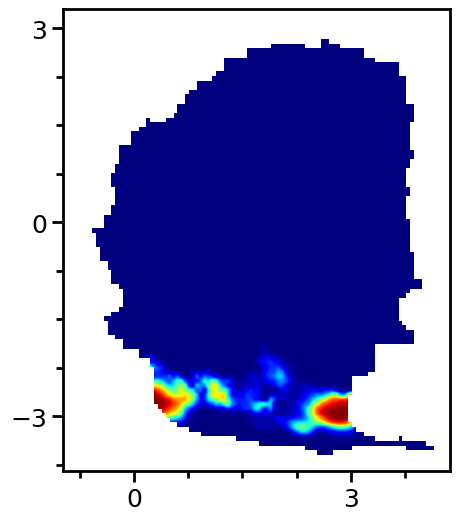

In [198]:
h=0 ; i=2
fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.tick_params(length=8, width=2, labelsize=18)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.xaxis.set_major_locator(mt.ticker.MaxNLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.imshow(mhists[m][h][i], 
          aspect='auto', extent=mextents[m][h][i], origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.savefig(f'saved_hists/mopr_{names[m]}_h{h}.png', transparent=True)
plt.show()